# Import Librairies

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

# Import Dataset

In [ ]:
# monter le disque googleDrive
drive.mount('/content/drive')
%cd /content/drive/Shareddrives/Ecole\ IA\ 4 Bordeaux/Partage\ Etudiants/
# ouvre le fichier
data = pd.read_csv("Billionaires Statistics Dataset.csv")

Mounted at /content/drive
/content/drive/Shareddrives/Ecole IA 4 Bordeaux/Partage Etudiants


# Analyse préliminaire

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [ ]:
for col in data.columns:
  if data[col].isnull().sum() > 0:
    print(f"La colonne {col} à {data[col].isnull().sum()} valeurs nulles")

La colonne age à 65 valeurs nulles
La colonne country à 38 valeurs nulles
La colonne city à 72 valeurs nulles
La colonne organization à 2315 valeurs nulles
La colonne birthDate à 76 valeurs nulles
La colonne firstName à 3 valeurs nulles
La colonne title à 2301 valeurs nulles
La colonne state à 1887 valeurs nulles
La colonne residenceStateRegion à 1893 valeurs nulles
La colonne birthYear à 76 valeurs nulles
La colonne birthMonth à 76 valeurs nulles
La colonne birthDay à 76 valeurs nulles
La colonne cpi_country à 184 valeurs nulles
La colonne cpi_change_country à 184 valeurs nulles
La colonne gdp_country à 164 valeurs nulles
La colonne gross_tertiary_education_enrollment à 182 valeurs nulles
La colonne gross_primary_education_enrollment_country à 181 valeurs nulles
La colonne life_expectancy_country à 182 valeurs nulles
La colonne tax_revenue_country_country à 183 valeurs nulles
La colonne total_tax_rate_country à 182 valeurs nulles
La colonne population_country à 164 valeurs nulles
La c

In [ ]:
data.age.isnull().sum()

65

<Axes: title={'center': 'Répartition par genre des Milliardaires'}, ylabel='gender'>

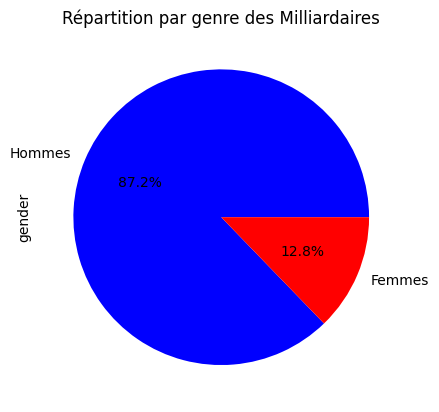

In [ ]:
# comparaison F/H
data.gender.value_counts().plot.pie(autopct='%1.1f%%',
                                    title = 'Répartition par genre des Milliardaires',
                                    labels=['Hommes','Femmes'],
                                    colors=['b','r'])

AttributeError: ignored

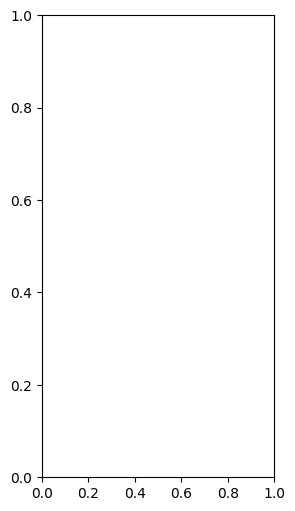

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(3,6))
ax1 = fig.subplot()
ax1.plot.box(data.age)